
# Assignment 16: SVM, Trees, Ensembles, Validation & Unsupervised Learning

**Dataset Used:**  
Titanic – train_and_test2.csv  
Kaggle Link: https://www.kaggle.com/datasets/heptapod/titanic

### Dataset Type
- Supervised Learning Dataset  
- Target Variable: **2urvived** (Classification: 0 = Not Survived, 1 = Survived)
- All input features are **numerical**


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

In [13]:
#part 1 : ADVANCED SUPERVISED ALGORITHMS
# TASK 1 – SVM
# Load the correct dataset file
data = pd.read_csv('train_and_test2.csv')

print(data.head())

# Select only numerical features with classification target '2urvived'
data = data.dropna()

X = data.drop('2urvived', axis=1)
y = data['2urvived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


   Passengerid   Age     Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
0            1  22.0   7.2500    0      1     0       0       0       0   
1            2  38.0  71.2833    1      1     0       0       0       0   
2            3  26.0   7.9250    1      0     0       0       0       0   
3            4  35.0  53.1000    1      1     0       0       0       0   
4            5  35.0   8.0500    0      0     0       0       0       0   

   zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  \
0       0  ...        0        0        0       3        0        0       2.0   
1       0  ...        0        0        0       1        0        0       0.0   
2       0  ...        0        0        0       3        0        0       2.0   
3       0  ...        0        0        0       1        0        0       2.0   
4       0  ...        0        0        0       3        0        0       2.0   

   zero.17  zero.18  2urvived  
0        0        0         0 

In [15]:

# Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
pred_linear = svm_linear.predict(X_test)

acc_linear = accuracy_score(y_test, pred_linear)
# RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
pred_rbf = svm_rbf.predict(X_test)

acc_rbf = accuracy_score(y_test, pred_rbf)

print("Linear Kernel Accuracy:", acc_linear)
print("RBF Kernel Accuracy:", acc_rbf)


Linear Kernel Accuracy: 0.8358778625954199
RBF Kernel Accuracy: 0.7290076335877863


Underfitting - Train: 0.8526315789473684
Underfitting - Test: 0.8702290076335878
Overfitting - Train: 1.0
Overfitting - Test: 0.8320610687022901


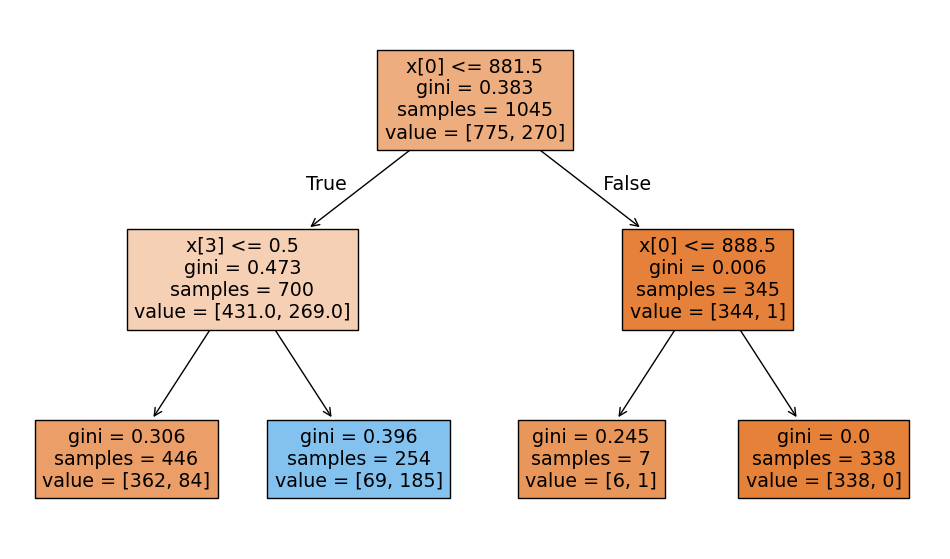

In [16]:

# TASK 2 – Decision Tree

tree_low = DecisionTreeClassifier(max_depth=2)
tree_low.fit(X_train, y_train)

tree_high = DecisionTreeClassifier(max_depth=20)
tree_high.fit(X_train, y_train)

print("Underfitting - Train:", accuracy_score(y_train, tree_low.predict(X_train)))
print("Underfitting - Test:", accuracy_score(y_test, tree_low.predict(X_test)))

print("Overfitting - Train:", accuracy_score(y_train, tree_high.predict(X_train)))
print("Overfitting - Test:", accuracy_score(y_test, tree_high.predict(X_test)))

plt.figure(figsize=(12,7))
plot_tree(tree_low, filled=True)
plt.show()


In [19]:
#PART 2 - MODEL VALIDATION AND CROSS VALIDATION
#  TASK 3 : Train / Validation / Test 

# Step 1: Split
X_temp, X_test2, y_temp, y_test2 = train_test_split(X, y, test_size=0.2, random_state=1)

X_train2, X_val, y_train2, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1)

# Step 2: Train with C=1
model_c1 = SVC(C=1)
model_c1.fit(X_train2, y_train2)

val_acc_c1 = accuracy_score(y_val, model_c1.predict(X_val))

# Step 3: Tune parameter C=10
model_c10 = SVC(C=10)
model_c10.fit(X_train2, y_train2)

val_acc_c10 = accuracy_score(y_val, model_c10.predict(X_val))

print("Validation Accuracy with C=1 :", val_acc_c1)
print("Validation Accuracy with C=10:", val_acc_c10)

# Select best model based on validation
best_model = model_c10 if val_acc_c10 > val_acc_c1 else model_c1

# Step 4: Final evaluation on test
final_test_acc = accuracy_score(y_test2, best_model.predict(X_test2))

print("Final Test Accuracy:", final_test_acc)


Validation Accuracy with C=1 : 0.7633587786259542
Validation Accuracy with C=10: 0.7862595419847328
Final Test Accuracy: 0.8244274809160306


### Comparison Logic

- Single train-test accuracy depends on one random split → may be biased  
- Cross-validation uses multiple folds → more stable estimate  
- If both are close → model is stable  
- If very different → model depends on data split


In [21]:

# TASK 4 – Cross Validation

#  Single Train-Test Accuracy 
model = SVC()
model.fit(X_train, y_train)

single_acc = accuracy_score(y_test, model.predict(X_test))
print("Single Train-Test Accuracy:", single_acc)

#  Cross Validation 

cv_scores = cross_val_score(SVC(), X, y, cv=kf)

print("Cross Validation Scores:", cv_scores)
print("Cross Validation Average:", np.mean(cv_scores))

#  Comparison 
print("\nComparison:")
print("Train-Test Accuracy :", single_acc)
print("CV Average Accuracy :", np.mean(cv_scores))



Single Train-Test Accuracy: 0.7290076335877863
Cross Validation Scores: [0.66030534 0.57251908 0.62068966 0.83908046 1.        ]
Cross Validation Average: 0.7385189084846889

Comparison:
Train-Test Accuracy : 0.7290076335877863
CV Average Accuracy : 0.7385189084846889


## TASK 5 – Bagging vs Boosting (Conceptual)

### Bagging
- Bagging stands for **Bootstrap Aggregating**.
- Multiple models are trained on different random samples of the dataset.
- Each model is trained **independently and in parallel**.
- Final prediction is obtained by averaging or majority voting.
- Main goal → **reduce variance and avoid overfitting**.

### Boosting
- Boosting trains models **sequentially**.
- Each new model focuses on correcting the errors made by previous models.
- Misclassified samples are given more weight.
- Main goal → **reduce bias and improve weak learners**.

### Key Difference
- Bagging → parallel, reduces variance  
- Boosting → sequential, reduces bias


In [25]:
#PART 3 : ENSEMBLE LEARNING
# TASK 5 – Bagging vs Boosting


from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

# Bagging Classifier
bag_model = BaggingClassifier()
bag_model.fit(X_train, y_train)

bag_acc = accuracy_score(y_test, bag_model.predict(X_test))

# AdaBoost Classifier
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

ada_acc = accuracy_score(y_test, ada_model.predict(X_test))

print("Bagging Accuracy :", bag_acc)
print("AdaBoost Accuracy:", ada_acc)


Bagging Accuracy : 0.851145038167939
AdaBoost Accuracy: 0.8740458015267175


## TASK 6 – Random Forest (Conceptual)

- Random Forest is an ensemble method based on **Bagging**.
- It builds multiple decision trees on random subsets of data and features.
- Final output is based on majority voting of trees.
- More stable than a single decision tree.
- Helps reduce overfitting and improves generalization.

### Comparison Idea
- Single Decision Tree → high variance, may overfit  
- Bagging → reduces variance  
- Random Forest → further improves by random feature selection


In [26]:
# TASK 6 – Random Forest and Comparison

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Single Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_acc = accuracy_score(y_test, dt.predict(X_test))

# Bagging (already trained above as bag_model)
bag_acc = accuracy_score(y_test, bag_model.predict(X_test))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_acc = accuracy_score(y_test, rf.predict(X_test))

print("Single Decision Tree Accuracy:", dt_acc)
print("Bagging Accuracy            :", bag_acc)
print("Random Forest Accuracy      :", rf_acc)

# Feature Importance
print("\nFeature Importance:")
for name, imp in zip(X.columns, rf.feature_importances_):
    print(name, ":", imp)


Single Decision Tree Accuracy: 0.8053435114503816
Bagging Accuracy            : 0.851145038167939
Random Forest Accuracy      : 0.8702290076335878

Feature Importance:
Passengerid : 0.3648389100391457
Age : 0.1541573705031201
Fare : 0.17627084849938454
Sex : 0.15085228707239312
sibsp : 0.038362859668129745
zero : 0.0
zero.1 : 0.0
zero.2 : 0.0
zero.3 : 0.0
zero.4 : 0.0
zero.5 : 0.0
zero.6 : 0.0
Parch : 0.030470807862516477
zero.7 : 0.0
zero.8 : 0.0
zero.9 : 0.0
zero.10 : 0.0
zero.11 : 0.0
zero.12 : 0.0
zero.13 : 0.0
zero.14 : 0.0
Pclass : 0.06013735032922184
zero.15 : 0.0
zero.16 : 0.0
Embarked : 0.024909566026088552
zero.17 : 0.0
zero.18 : 0.0
